In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [2]:
script_dir = os.getcwd()
data_path = os.path.join(script_dir, 'data')
data = []

categories = os.listdir(data_path)
for i, category in enumerate(categories):
    category_path = os.path.join(data_path, category)
    for img in os.listdir(category_path):
        img_path = os.path.join(category_path, img)
        img_array = cv2.imread(img_path)
        img_array = cv2.resize(img_array, (256, 256))
        data.append([img_array, i])
    print(f"Loaded {len(os.listdir(category_path))} images from {category_path}")


Loaded 1500 images from c:\Users\Seifl\Documents\Robotics\MA4\Swisscom\data\cloudy
Loaded 1131 images from c:\Users\Seifl\Documents\Robotics\MA4\Swisscom\data\desert
Loaded 1500 images from c:\Users\Seifl\Documents\Robotics\MA4\Swisscom\data\green_area
Loaded 1500 images from c:\Users\Seifl\Documents\Robotics\MA4\Swisscom\data\water


The ideas I thought about for the simple baseline model were first to count the nb of pixels of a certain color, having seen a few images of the dataset before, to being blue, green, a shade of pink/orange/beige??? and then set a threshold for the number of pixels and the rgb values to decide the color, and then decide based on the number of pixels the class. But this is too simple and cannot be practical neither can it be accurate in an acceptable way.

Another simple idea was a logistic regression, although I am not so optimistic about its accuracy, since images being flattened to a 1D dataset is somewhat close to just counting the pixels, there is no spatial relations between pixels, taking away from what the model can learn to be able to predict the class.

In [3]:
np.random.shuffle(data)
images, labels = zip(*data)
images = np.array(images)
labels = np.array(labels)

# Normalize the images in case I dont want to classify them using the total number of pixels a certain color
# Check whether normalizing the images is better or not
images = images.astype('float32') 
images_norm = images.astype('float32') / 255.0


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(images_norm, labels, test_size=0.2, random_state=42)

In [4]:
# Flatten the images for the baseline simple model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat_norm = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat_norm = X_test_norm.reshape(X_test_norm.shape[0], -1)

In [5]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_flat, y_train)
y_pred = logistic_model.predict(X_test_flat)
print("Logistic Regression Model")

logitic_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {logitic_accuracy * 100:.2f}%")

d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model
Accuracy: 74.18%


Confusion Matrix:
[[250  45   2  12]
 [ 24 205   0   0]
 [  1   0 146 154]
 [  5   1  47 235]]


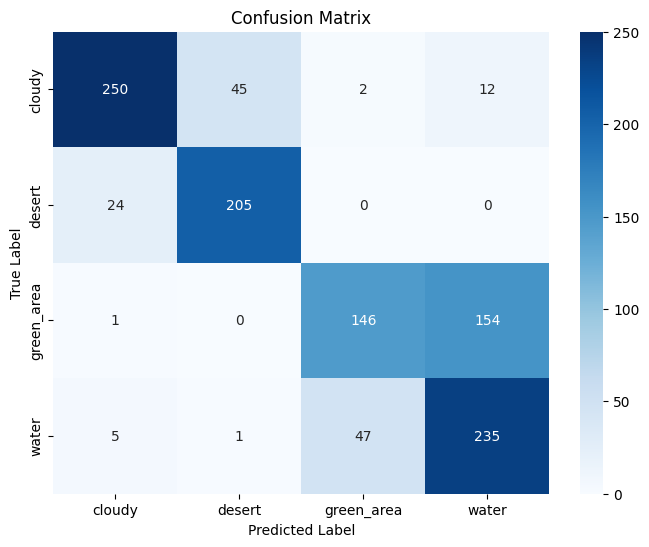

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       309
           1       0.82      0.90      0.85       229
           2       0.75      0.49      0.59       301
           3       0.59      0.82      0.68       288

    accuracy                           0.74      1127
   macro avg       0.76      0.75      0.74      1127
weighted avg       0.76      0.74      0.74      1127



In [6]:
class_names = categories
cm_logistic = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           ) # Add xticklabels and yticklabels if you have class_names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [7]:
logistic_model_norm = LogisticRegression(max_iter=1000)
logistic_model_norm.fit(X_train_flat_norm, y_train)
y_pred_norm = logistic_model_norm.predict(X_test_flat_norm)
print("Logistic Regression Model with Normalized Images")

logitic_accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(f"Accuracy: {logitic_accuracy_norm * 100:.2f}%")

d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model with Normalized Images
Accuracy: 81.46%


Confusion Matrix:
[[253  43   2  11]
 [ 10 219   0   0]
 [  1   0 191 109]
 [  3   0  30 255]]


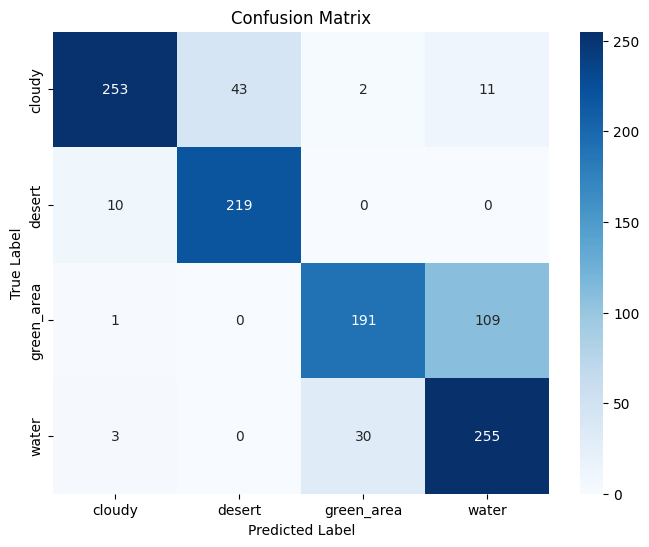

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       309
           1       0.84      0.96      0.89       229
           2       0.86      0.63      0.73       301
           3       0.68      0.89      0.77       288

    accuracy                           0.81      1127
   macro avg       0.83      0.82      0.82      1127
weighted avg       0.83      0.81      0.81      1127



In [8]:
class_names = categories
cm_logistic_norm = confusion_matrix(y_test, y_pred_norm)
print("Confusion Matrix:")
print(cm_logistic_norm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic_norm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           ) # Add xticklabels and yticklabels if you have class_names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_norm))

The logistic regression's accuracy was 82%, but still I would not choose it for this application, it is not by any means practical for such a classification task, especially the fact that it failed to converge after 1000 iterations, it relies on "luck", so the logistic regression is not suitable for this classification, which was expected. Next I will be trying SVM.

And yes, the normalization gave us a good advantage and increased significantly the performance, so we will keep using the normalized version of the data.

In [9]:
svm_model = SVC(kernel='rbf', verbose=True)
svm_model.fit(X_train_flat_norm, y_train)

svm_pred = svm_model.predict(X_test_flat_norm)
print("SVM Model")
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy: {svm_accuracy * 100:.2f}%")

[LibSVM]SVM Model
Accuracy: 91.57%


Confusion Matrix:
[[286  18   2   3]
 [  7 222   0   0]
 [  0   0 284  17]
 [  0   0  48 240]]


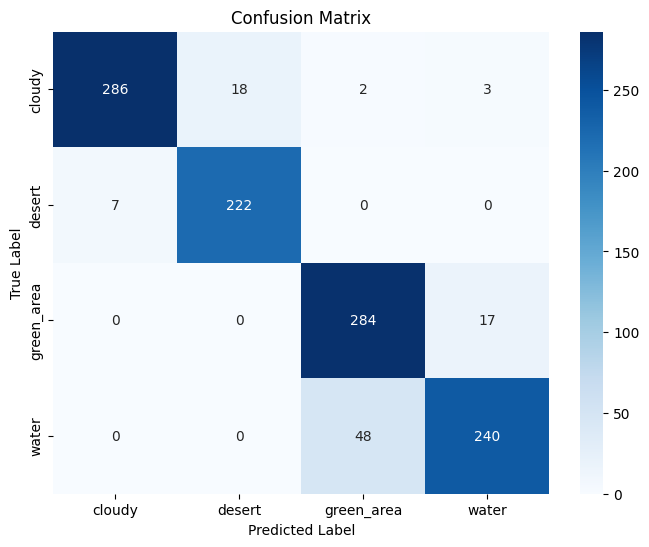

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       309
           1       0.93      0.97      0.95       229
           2       0.85      0.94      0.89       301
           3       0.92      0.83      0.88       288

    accuracy                           0.92      1127
   macro avg       0.92      0.92      0.92      1127
weighted avg       0.92      0.92      0.92      1127



In [11]:
class_names = categories
cm_svm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:")
print(cm_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           ) # Add xticklabels and yticklabels if you have class_names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, svm_pred))

The SVM's accuracy got to be 91%, which is good, it was expected to be better than the simple logistic regression. To be talking in practical point of view, I would use SVM in such a case, whether to choose rbf or linear kernel can be subject to discuss, that's why we will try another time with a linear kernel and see if the difference in performance is that significant or we can choose a linear kernel, which is much faster to "train" (fit) and predict  

In [13]:
svm_model_lin = SVC(kernel='linear', verbose=True)
svm_model_lin.fit(X_train_flat_norm, y_train)

svm_pred_lin = svm_model_lin.predict(X_test_flat_norm)
print("SVM Model with linear kernel")
svm_accuracy_lin = accuracy_score(y_test, svm_pred_lin)
print(f"Accuracy: {svm_accuracy_lin * 100:.2f}%")

[LibSVM]

NameError: name 'svm_model_' is not defined

In [14]:
svm_pred_lin = svm_model_lin.predict(X_test_flat_norm)
print("SVM Model with linear kernel")
svm_accuracy_lin = accuracy_score(y_test, svm_pred_lin)
print(f"Accuracy: {svm_accuracy_lin * 100:.2f}%")

SVM Model with linear kernel
Accuracy: 80.04%


Confusion Matrix:
[[286  18   2   3]
 [  7 222   0   0]
 [  0   0 284  17]
 [  0   0  48 240]]


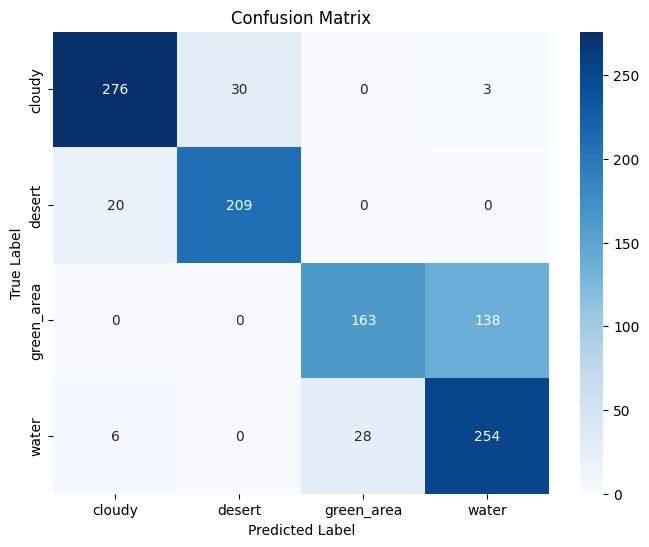

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       309
           1       0.87      0.91      0.89       229
           2       0.85      0.54      0.66       301
           3       0.64      0.88      0.74       288

    accuracy                           0.80      1127
   macro avg       0.82      0.81      0.80      1127
weighted avg       0.82      0.80      0.80      1127



In [15]:
cm_svm_lin = confusion_matrix(y_test, svm_pred_lin)
print("Confusion Matrix:")
print(cm_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_lin, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           ) # Add xticklabels and yticklabels if you have class_names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, svm_pred_lin))

Having a SVM with a linear kernel, was indeed 50% faster in training than having the same SVM with a rbf kernel, and gives us an accuracy of 81%, which is still statistically different than the rbf kernel. Now the SVM gives us the same accuracy as the logistic regression, not brining any advantages while taking 100% more time than the logistic regression, so I would not choose this baseline as the simple one to classify these images. 

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_flat_norm, y_train)

knn_pred = knn_model.predict(X_test_flat_norm)
print("KNN Model")
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {knn_accuracy * 100:.2f}%")

d:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

KNN Model
Accuracy: 88.02%


Confusion Matrix:
[[303   3   1   2]
 [ 18 211   0   0]
 [  0   0 202  99]
 [  0   0  12 276]]


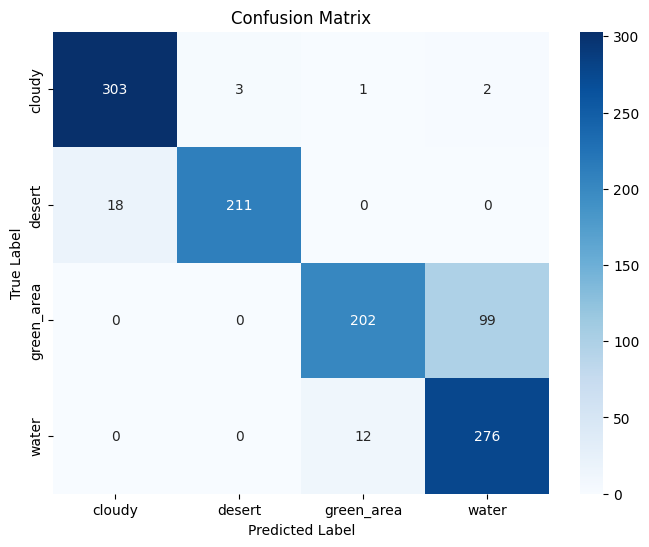

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       309
           1       0.99      0.92      0.95       229
           2       0.94      0.67      0.78       301
           3       0.73      0.96      0.83       288

    accuracy                           0.88      1127
   macro avg       0.90      0.88      0.88      1127
weighted avg       0.90      0.88      0.88      1127



In [ ]:
cm_knn = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:")
print(cm_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, knn_pred))

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train_flat_norm, y_train)

nb_pred = nb_model.predict(X_test_flat_norm)
print("Naive Bayes Model")
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {nb_accuracy * 100:.2f}%")

Naive Bayes Model
Accuracy: 76.13%


Confusion Matrix:
[[238  61   1   9]
 [ 17 212   0   0]
 [  0   0 280  21]
 [ 15   0 145 128]]


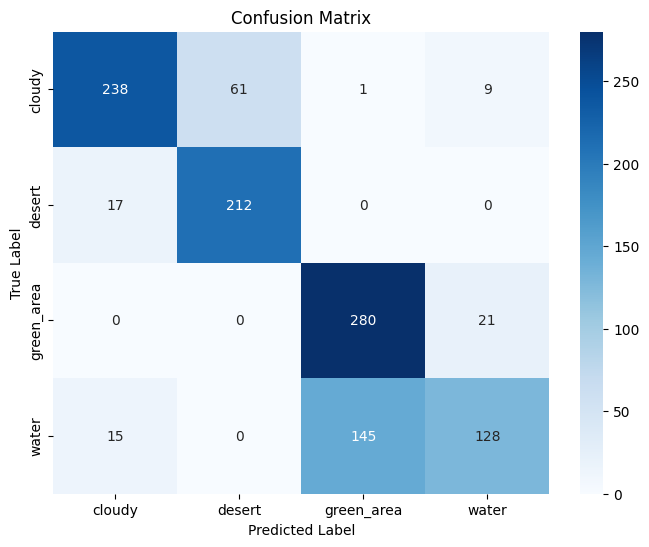

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       309
           1       0.78      0.93      0.84       229
           2       0.66      0.93      0.77       301
           3       0.81      0.44      0.57       288

    accuracy                           0.76      1127
   macro avg       0.78      0.77      0.75      1127
weighted avg       0.78      0.76      0.75      1127



In [19]:
cm_nb = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix:")
print(cm_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           ) # Add xticklabels and yticklabels if you have class_names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, nb_pred))

The KNN and the gaussian naive bayes models were super fast to train (fit) compared to all the other algorithms, which is why they would make a good choice for the constrained environment, although the constrained environment would affect the choice of timed inference/prediction and not really that of the training/fitting of the algorithm. 



Now the next step I got was to test whether flattening the images affected really their performance, or was it a good idea?
Knowing that we are processing images, so we would want to detect the pixels' spatial position relations, relevant to usual classification tasks (although this task with this dataset is a bit too simple). However, classic machine learning algorithms do not support array with high dimensions ==> they cannot handle spatial relationships, so this is a roadbloack and a plateau reached, although a solution can be found for this.

So to give a conclusion to this first half of the task, the best model found was the SVM, although it took the longest to fit the model onto the training data, but I would still choose it in the real classification task if I cannot choose a deep learning model. All of this is based on the fact that we "do not care" about the time taken in training/fitting the model since we do not train on device (constrained environment/embedded system). 

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train_flat_norm, y_train)

knn_pred_50 = knn_model.predict(X_test_flat_norm)
print("KNN Model with 50 neighbors")
knn_accuracy = accuracy_score(y_test, knn_pred_50)
print(f"Accuracy: {knn_accuracy * 100:.2f}%")

KNN Model with 50 neighbors
Accuracy: 89.35%


Confusion Matrix:
[[289  11   2   7]
 [ 13 216   0   0]
 [  0   0 236  65]
 [  0   0  22 266]]


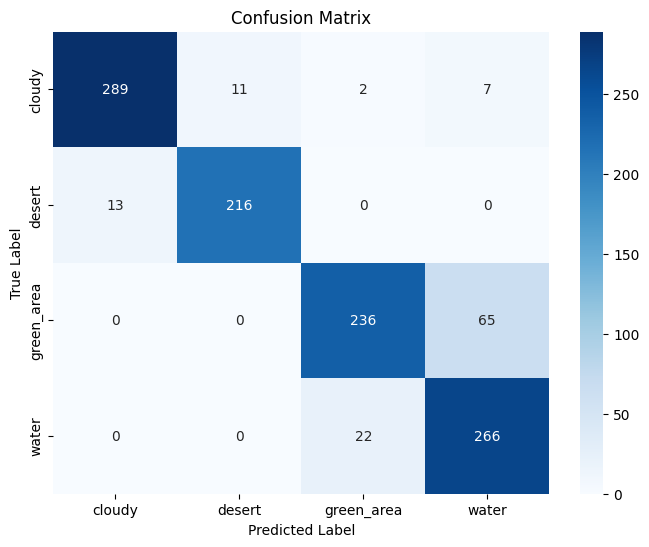

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       309
           1       0.95      0.94      0.95       229
           2       0.91      0.78      0.84       301
           3       0.79      0.92      0.85       288

    accuracy                           0.89      1127
   macro avg       0.90      0.90      0.90      1127
weighted avg       0.90      0.89      0.89      1127



In [21]:
cm_knn50 = confusion_matrix(y_test, knn_pred_50)
print("Confusion Matrix:")
print(cm_knn50)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn50, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           ) # Add xticklabels and yticklabels if you have class_names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, knn_pred_50))

The kNN algorithm was also not bad at all, since it acheived an 85% accuracy, much better than all the rest of the algorithms, while taking only so less to fit the model and to predict the testing data, which was good, and I could even get it better by increasing the number of neighbors needed to 50, where I hit a plateau of 90%, which is still perfectly good.

But here we would have to take a decision, what is more of a priority for us, time efficency or accuracy. 
Another thing that we must think about is the actual dataset, here the dataset is a bit homogeneous, meaning in a category the difference between datasamples is not that large, which gives a simple algorithm like kNN an advantage, but in most other cases this will not be the case and we would have a lot of disparity between datasamples in the same category, difference of lightning, the details of the image and other things.

Also, at the end of the day, kNN might not (and most probably will not) scale well to larger datasets, since for its inference it has to compute the distance to check the k nearest neighbors, while the SVM can scale more effectively, since it is already trained and the decision boundary is already defined, and will predict much faster without much complex computations.

In [23]:
X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [24]:
# We will keep the training set for the CNN model, and split the testing set into testing and validation sets
# X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_cnn = torch.tensor(X_train).permute(0, 3, 1, 2)
X_test_cnn = torch.tensor(X_test_cnn).permute(0, 3, 1, 2)
X_val_cnn = torch.tensor(X_val_cnn).permute(0, 3, 1, 2)
y_train_cnn = torch.tensor(y_train, dtype=torch.long)
y_test_cnn = torch.tensor(y_test_cnn, dtype=torch.long)
y_val_cnn = torch.tensor(y_val_cnn, dtype=torch.long)

# DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train_cnn, y_train_cnn), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_cnn, y_val_cnn), batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_cnn, y_test_cnn), batch_size=32, shuffle=False)

In [25]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 64 * 64, 64)
        self.fc2 = nn.Linear(64, len(categories))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [26]:
device = torch.device("cpu")

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

In [27]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
        train_accuracy = train_correct / train_total
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss / len(train_loader):.4f}, Accuracy: {train_accuracy:.4f}")

        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
            val_accuracy = val_correct / val_total
            print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}")

In [28]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/10], Loss: 16.9995, Accuracy: 0.5844
Validation Loss: 0.5517, Validation Accuracy: 0.7194
Epoch [2/10], Loss: 0.6490, Accuracy: 0.6679
Validation Loss: 0.4768, Validation Accuracy: 0.7762
Epoch [3/10], Loss: 0.5860, Accuracy: 0.7178
Validation Loss: 0.4799, Validation Accuracy: 0.7211
Epoch [4/10], Loss: 0.5909, Accuracy: 0.7158
Validation Loss: 0.4994, Validation Accuracy: 0.8011
Epoch [5/10], Loss: 0.5330, Accuracy: 0.7538
Validation Loss: 0.4065, Validation Accuracy: 0.8384
Epoch [6/10], Loss: 0.5557, Accuracy: 0.7464
Validation Loss: 0.4021, Validation Accuracy: 0.8348
Epoch [7/10], Loss: 0.4985, Accuracy: 0.7758
Validation Loss: 0.3809, Validation Accuracy: 0.8366
Epoch [8/10], Loss: 0.5164, Accuracy: 0.7702
Validation Loss: 0.4345, Validation Accuracy: 0.7869
Epoch [9/10], Loss: 0.5514, Accuracy: 0.7265
Validation Loss: 0.5127, Validation Accuracy: 0.8028
Epoch [10/10], Loss: 0.5204, Accuracy: 0.7629
Validation Loss: 0.3788, Validation Accuracy: 0.8579


In [31]:
def test_model(model, test_loader, criterion):
    model.eval()
    test_loss, test_correct, test_total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    test_accuracy = test_correct / test_total
    print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.4f}")

    return all_preds, all_labels

In [32]:
all_preds, all_labels = test_model(model, test_loader, criterion)

Test Loss: 0.3663, Test Accuracy: 0.8723


Confusion Matrix:
[[140  17   0   1]
 [  2 114   0   0]
 [  0   0 138  13]
 [  5   0  34 100]]


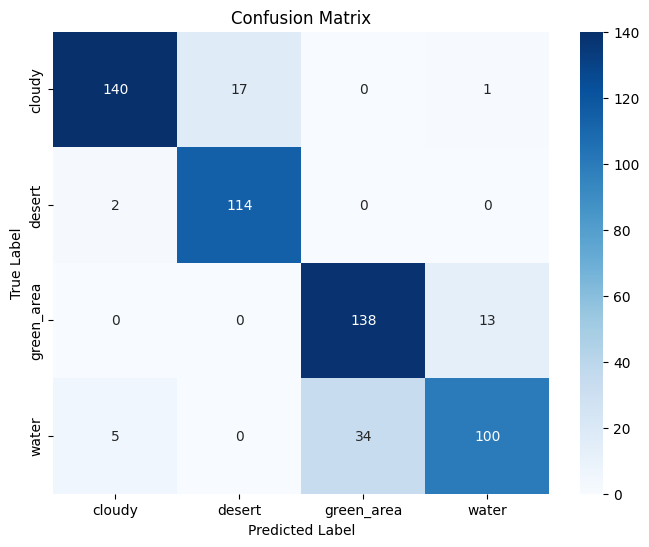

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       158
           1       0.87      0.98      0.92       116
           2       0.80      0.91      0.85       151
           3       0.88      0.72      0.79       139

    accuracy                           0.87       564
   macro avg       0.88      0.88      0.87       564
weighted avg       0.88      0.87      0.87       564



In [33]:
cm_cnn = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
           ) # Add xticklabels and yticklabels if you have class_names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(all_labels, all_preds))

Having two convolutional layers (since the images do not really have that much details to extract, or at least I though), using max pooling, two fully connected layers, gives us at the end a test accuracy of 93%. Which is good, compared to the kNN algorithm with 50 neighbors, which gave 90.33% as an accuracy.

We have to think about a lot of factors: first of all the time needed to train, the data similarity inside the same category, the ability to generalize and use the model on different data, the different metrics to determine the performance of the model/algorithm.

I will explain each one for a bit.

- Time needed to train/fit: straight to the point, to what extent is this parameter important and how much does it affect the choice, because the best simple algorithm and deep learning model are much different, but also how significant is the performance difference between both algorithms? Are these 3% testing accuracy really that important?
- The data similarity inside the same category: The images here were almost all similar inside the same dataset, that's why an algorithm like kNN worked well, because of the high similarity ==> the details in the pictures were not that relevant, makes sense as to why the three convolutional layer-model did not work (next), because the third layer was extracting something that was not even there/not relevant. So when the dataset is more "diverse", which comes mathematically to having a higher standard deviation, we would need a better model to generalize, and detect the important relevant details, rather than just something superficial as does a one layer NN or as the flattened images used in the kNN algorithm, we would need a more complex model, with better detection, but of course with higher computational power needs and higher training (& inference) time needs.
- Different metrics to use to determine the performance: The accuracy metric is the most basic metric I could have used a confusion matrix, precision recall & f1, but also top-k accuracy for the CNN, which can be more meaningful than the basic accuracy. Although we have to keep in mind that the data was randomized before being used, meaning that we don't have the same number of each class in the testing dataset. This can be interesting in real applications that will cause some action upon the detected class, so better to know which class was better detected, which was not, and those who are less detected than others, to which classes are they predicted, and so on...

I will be trying now to increase the nb of convolutional layers to three and see if the performance improves. 

So a third layer wasnt the solution to the relatively low accuracy, it even had it worse than it was before. Normally I wouldnt opt for such an overkill as a transformer, especially that the dataset is super simple. However, it is there as a good tool to use (when things become more complex with more details).

With this being said, we can safely conclude that the best simple baseline model is kNN (the more the required neighbors the better), and the best deep learning model is a "simple" CNN without using transformers, with only two convolutional layers.
Some points were discussed here in markdown, others will be discussed more in details during the interview.